___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [53]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [54]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [55]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [56]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

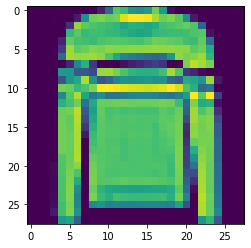

In [57]:
plt.imshow(x_train[5])

In [58]:
y_train[5]

2

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [59]:
x_train.max()

255

In [60]:
x_train = x_train/255

In [61]:
x_test = x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [62]:
x_train.shape

(60000, 28, 28)

In [63]:
x_train = x_train.reshape(60000,28,28,1)

In [64]:
x_test = x_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [65]:
from tensorflow.keras.utils import to_categorical

In [66]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [67]:
y_cat_train = to_categorical(y_train)

In [68]:
y_cat_test = to_categorical(y_test)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [70]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:

early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 3)

In [73]:
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 32, epochs = 10, verbose = 1,
          callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4292 - accuracy: 0.8550 - val_loss: 0.3178 - val_accuracy: 0.8888
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3022 - accuracy: 0.8943 - val_loss: 0.3155 - val_accuracy: 0.8915
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2890 - accuracy: 0.9005 - val_loss: 0.2900 - val_accuracy: 0.8970
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2827 - accuracy: 0.9035 - val_loss: 0.3168 - val_accuracy: 0.8904
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2792 - accuracy: 0.9046 - val_loss: 0.3177 - val_accuracy: 0.8876
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2783 - accuracy: 0.9056 - val_loss: 0.2904 - val_accuracy: 0.9004
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2805 - accuracy: 0.9052 - val_loss: 0.3032 - val_accurac

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.429173,0.854967,0.317800,0.8888
1,0.302150,0.894267,0.315457,0.8915
2,0.288990,0.900500,0.289959,0.8970
3,0.282701,0.903533,0.316821,0.8904
4,0.279216,0.904600,0.317664,0.8876


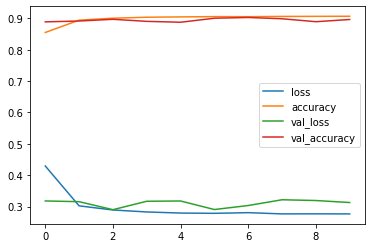

In [75]:
loss_df.plot();

**TASK 7: Plot values of metrics you used in your model.**

In [76]:
model.metrics_names

['loss', 'accuracy']

In [77]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3128 - accuracy: 0.8963


[0.312770813703537, 0.8963000178337097]

In [78]:
from sklearn.metrics import classification_report

In [79]:
predictions = model.predict(x_test)
predictions

array([[1.4084868e-08, 2.3970593e-12, 5.0283088e-08, ..., 3.2863062e-04,
        3.5068758e-06, 9.9923766e-01],
       [1.1323411e-05, 1.8906724e-19, 9.9997926e-01, ..., 2.0060092e-13,
        2.0657438e-12, 3.0917096e-17],
       [2.1358039e-06, 9.9999511e-01, 3.4726682e-08, ..., 6.2525940e-09,
        3.0750135e-07, 4.3418205e-10],
       ...,
       [2.0010095e-10, 1.3268732e-23, 2.3045679e-13, ..., 6.5252023e-14,
        1.0000000e+00, 3.3493120e-16],
       [6.0575530e-07, 9.9997330e-01, 2.6083629e-08, ..., 3.3229868e-09,
        1.3443467e-07, 2.1299145e-09],
       [5.0541334e-02, 2.2477403e-03, 5.0050121e-02, ..., 2.3137575e-01,
        7.1711615e-02, 4.4535499e-02]], dtype=float32)

In [80]:
preds=np.argmax(predictions,axis=1)
preds

array([9, 2, 1, ..., 8, 1, 5])

In [81]:
y_cat_test.shape

(10000, 10)

In [82]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [83]:
np.argmax(predictions[0])

9

In [84]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [85]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.87      0.79      0.83      1000
           3       0.87      0.93      0.90      1000
           4       0.80      0.86      0.83      1000
           5       0.95      0.98      0.97      1000
           6       0.75      0.68      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Prediction

In [87]:
img=x_test[19]
img.shape

(28, 28, 1)

In [89]:
type(img)

numpy.ndarray

In [90]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [91]:
model.predict(resized_img)

array([[9.6514547e-01, 7.4041833e-07, 2.5464449e-04, 1.4180767e-03,
        2.6693208e-06, 1.0815032e-08, 3.3135485e-02, 2.4318130e-09,
        4.2917196e-05, 3.7316569e-12]], dtype=float32)

In [92]:
np.argmax(model.predict(resized_img))

0

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___